**Gradient Descent**

It is an iterative optimization algorithm used in machine learning to find the best results (minima of a curve).

The algorithm is iterative, meaning the results have to be obtained multiple times to get the most optimal result. The iterative quality of the gradient descent helps a under-fitted graph to make the graph fit optimally to the data.

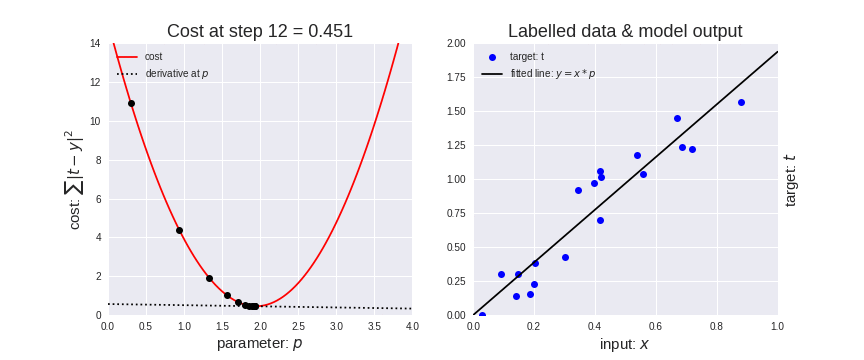

The Gradient descent has a parameter called learning rate. As you can see above (left), initially the steps are bigger that means the learning rate is higher and as the point goes down the learning rate becomes more smaller by the shorter size of steps. Also,the Cost/Loss Function is decreasing.  



# Epoch

One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

Since Gradient Descent is an iterative process, updating the weights with single pass or one epoch is not enough. As only one epoch leads to underfitting of the curve. The model has to be trained at an optimum number of epochs so that the model is not overfit.  

## References

 [Epoch vs Batch Size vs Iterations](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)



# Mini-Batch 
For a Mini-Batch Gradient Descent, neither the entire dataset's mean gradient (like Batch Gradient) nor the single example at a time (like Stochastic Gradient Descent) is used . Rather, a batch of a fixed number of training examples which is less than the actual dataset is used and is termed as **Mini-Batch**.  

The following steps are carried out for one epoch: 


1.  Pick a mini-batch
2.  Feed it to Neural Network
3.  Calculate the mean gradient of the mini-batch
4.  Use the mean gradient we calculated in step 3 to update the weights
5.  Repeat steps 1–4 for the mini-batches we created

  Thus when we are using the mini-batch gradient descent we are updating our parameters frequently as well as we can use vectorized implementation for faster computations.




## References

[Batch, Mini Batch & Stochastic Gradient Descent](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a) 

# Moment 


The method of momentum is designed to accelerate learning, especially in the face of high curvature, small but consistent gradients, or noisy gradients. The momentum algorithm accumulates an exponentially decaying moving average of past gradients and continues to move
in their direction.

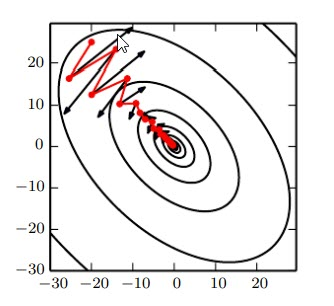  


**Adam** 

The name “Adam” derives from the phrase “adaptive moments.” In addition to storing an exponentially decaying average of past squared gradients 
vₜ like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients mₜ , similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface. 

We compute the decaying averages of past and past squared gradients 
mₜ  and vₜ respectively as follows: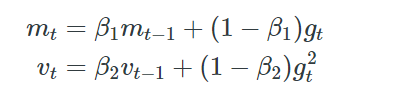 


mₜ and vₜ are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively, hence the name of the method. 

They counteract these biases by computing bias-corrected first and second moment estimates: 

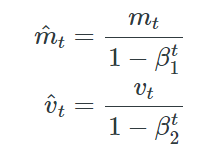 

They then use these to update the parameters just as we have seen in Adadelta and RMSprop, which yields the Adam update rule:
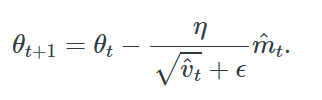


##References

[An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)

# Loss functions 

Machines learn by means of a loss function. It’s a method of evaluating how well specific algorithm models the given data. If predictions deviates too much from actual results, loss function would cough up a very large number. Gradually, with the help of some optimization function, loss function learns to reduce the error in prediction. 

Loss functions can be categorized as below: 

*   Regression Loss Functions
*   Classification Loss Functions




## Regression Loss Functions

### Mean Square Error/Quadratic Loss/L2 Loss 

It is the preferred loss function under the inference framework of maximum likelihood if the distribution of the target variable is Gaussian. Mean squared error is calculated as the average of the squared differences between the predicted and actual values. 

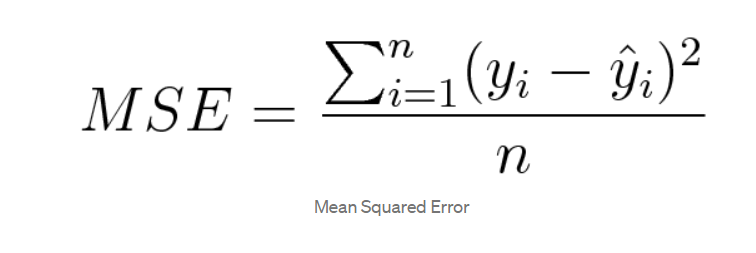

We can see that the model converged reasonably quickly and both train and test performance remained equivalent. The performance and convergence behavior of the model suggest that mean squared error is a good match for a neural network learning this problem.

In [ ]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Mean Absolute Error/L1 Loss 

On some regression problems, the distribution of the target variable may be mostly Gaussian, but may have outliers, e.g. large or small values far from the mean value. 

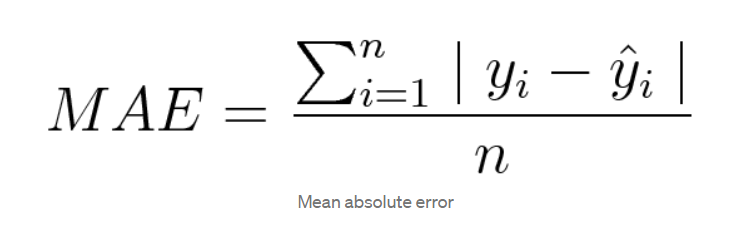 

we can see that MAE does converge but shows a bumpy course, although the dynamics of MSE don’t appear greatly affected. We know that the target variable is a standard Gaussian with no large outliers, so MAE would not be a good fit in this case.

In [ ]:
# mlp for regression with mae loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

## Classification Loss Functions

### Hinge Loss 

It is intended for use with binary classification where the target values are in the set {-1, 1}.

The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values. 

The Hinge Loss is calculated as below, 

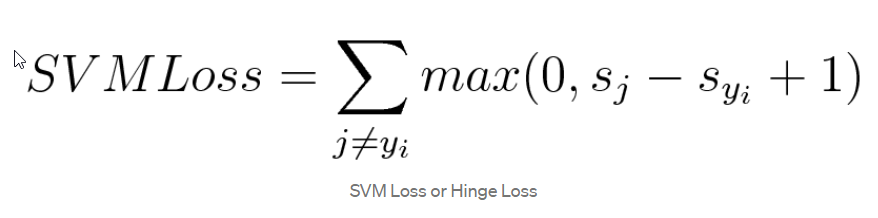  


It shall be calculated as below,
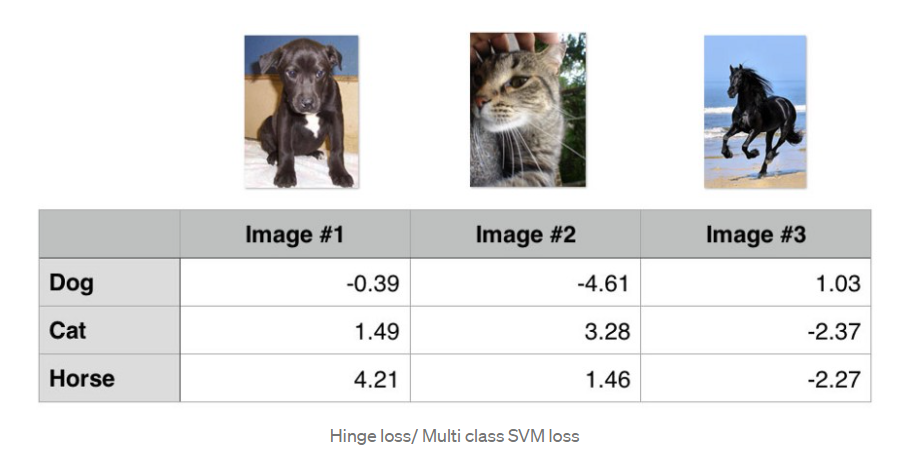


In [ ]:
## The algorithm calculates as below:

## 1st training example
max(0, (1.49) - (-0.39) + 1) + max(0, (4.21) - (-0.39) + 1)
print(max(0, 2.88) + max(0, 5.6), "High loss as very wrong prediction") 

## 2nd training example
max(0, (-4.61) - (3.28)+ 1) + max(0, (1.46) - (3.28)+ 1)
print(max(0, -6.89) + max(0, -0.82),"Zero loss as correct prediction")

## 3rd training example
max(0, (1.03) - (-2.27)+ 1) + max(0, (-2.37) - (-2.27)+ 1)
print(max(0, 4.3) + max(0, 0.9),"High loss as very wrong prediction")


The plot of hinge loss shows that the model has converged and has reasonable loss on both datasets. The plot of classification accuracy also shows signs of convergence, albeit at a lower level of skill than may be desirable on this problem.

In [ ]:
# mlp for the circles problem with hinge loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### Cross-entropy Loss/Negative Log Likelihood 

Cross-entropy is the default loss function to use for multi-class classification problems.

In this case, it is intended for use with multi-class classification where the target values are in the set {0, 1, 3, …, n}, where each class is assigned a unique integer value.

Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.  

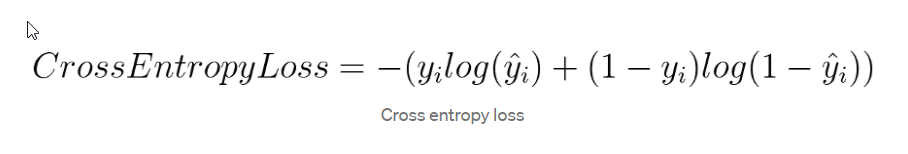


Notice that when actual label is 1 (y(i) = 1), second half of function disappears whereas in case actual label is 0 (y(i) = 0) first half is dropped off. In short, we are just multiplying the log of the actual predicted probability for the ground truth class. An important aspect of this is that cross entropy loss penalizes heavily the predictions that are confident but wrong. 

In this case, the plot shows the model seems to have converged. The line plots for both cross-entropy and accuracy both show good convergence behavior, although somewhat bumpy. The model may be well configured given no sign of over or under fitting. The learning rate or batch size may be tuned to even out the smoothness of the convergence in this case.

In [ ]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## References 

[How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)


[Common Loss functions in machine learning](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23)


# Data Leakage 

A naive approach to preparing data applies the transform on the entire dataset before evaluating the performance of the model. This results in a problem referred to as data leakage, where knowledge of the hold-out test set leaks into the dataset used to train the model. This can result in an incorrect estimate of model performance when making predictions on new data.

A careful application of data preparation techniques is required in order to avoid data leakage, and this varies depending on the model evaluation scheme used, such as train-test splits or k-fold cross-validation. 


## Data preparation with Data Leakage 

In [ ]:
# naive approach to normalizing the data before splitting the data and evaluating the model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

## Data preparation without Data Leakage 

In [ ]:
# correct approach for normalizing the data after the data is split before the model is evaluated
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the scaler
scaler = MinMaxScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test = scaler.transform(X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

It is seen that the data leakage is prevented as the calculation of the minimum and maximum value for each input variable is calculated using only the training dataset (X_train) instead of the entire dataset (X).

## References

[How to Avoid Data Leakage When Performing Data Preparation](https://machinelearningmastery.com/data-preparation-without-data-leakage/)

# Early Stopping

When training large models with sufficient representational capacity to overfit
the task, it is often observed that training error decreases steadily over time, but
validation set error begins to rise again.  


Let us look at one such scenario, the following implmentation of MNIST classification using keras: 

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

#Create training dataset
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

#Create testing dataset
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

#Create and train the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
 ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=60,
    validation_data=ds_test,
)
#Visualize the results
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history,'loss')

 **Observe that the training objective
decreases consistently over time, but the validation set loss eventually begins to
increase again**


This means a model with better validation set error (and thus, hopefully better test set error) can be obtained by returning to the parameter setting at the point in 
time with the lowest validation set error. Every time the error on the validation set
improves, a copy of the model parameters is made. When the training algorithm
terminates, this copy is returned, rather than the latest parameters. The 
algorithm terminates when no parameters have improved over the best recorded
validation error for some pre-specified number of iterations. 
This strategy is known as **early stopping**. 

##Early Stopping implementation in keras

The Keras module contains a built-in callback designed for Early Stopping.

First, import the EarlyStopping callback and create an early stopping object early_stopping .

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=0)

EarlyStopping() has a few options and by default:

*   monitor='val_loss': to use validation loss as performance measure to terminate the training.

*   patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.



EarlyStopping stops training when a monitored metric has stopped improving. 

In [ ]:
history = model.fit(
    ds_train,
    epochs=60,
    validation_data=ds_test, 
    callbacks = [early_stopping]
)

In [ ]:
plot_metric(history, 'loss')

##References



[Early Stopping in Practice](https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd)


[EarlyStopping Keras API](https://keras.io/api/callbacks/early_stopping/)

Regularization for Deep Learning - Deep Learning by By Ian Goodfellow, Yoshua Bengio and Aaron Courville,  MIT Press





# Feature Scaling 


Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. It is always a good practice to normalize features that use different scales and ranges.


Let us take the following example of fuel efficiency use case and perform the EDA. 

In [ ]:
# Get the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

#remove the null values
dataset = raw_dataset.dropna().copy()

#Perform imputation
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

#Split into train and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index) 

# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG') 


Let us look at the summary of the input to the model


In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

There is a problem in feeding these inputs directly to the model: 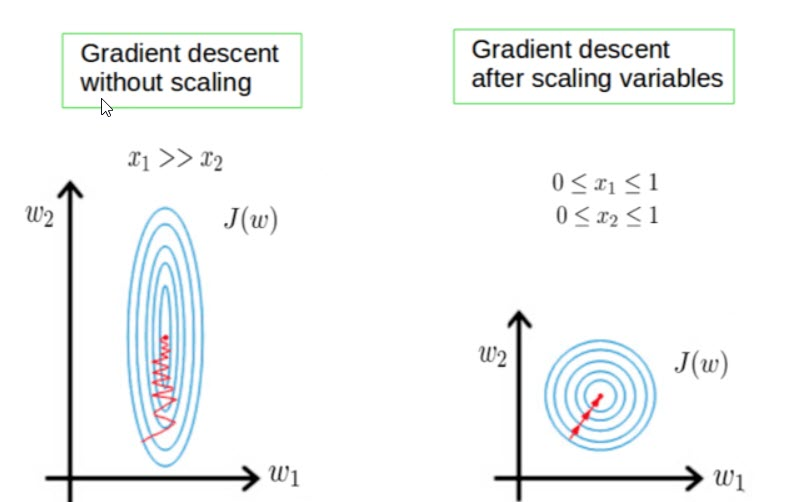 

Photo Credit: https://stackoverflow.com/questions/46686924/why-scaling-data-is-very-important-in-neural-networklstm/46688787#46688787

It is seen that Neural network gradient descent converge much faster with feature scaling than without it.

The most common techniques of feature scaling are Normalization and Standardization. 

## Normalization


**Normalization** is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. 

Normalization can be achieved using sklearn's Min-Max scaler 

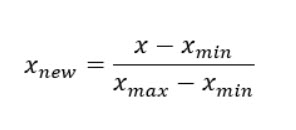 

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. 

**Limitations**

This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. 
This Scaler is sensitive to outliers.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max = pd.DataFrame(scaler.fit_transform(train_dataset),
                   columns= train_dataset.columns,
                   index = train_dataset.index)
min_max.describe().transpose()[['mean', 'std']]

## Standardization


**Standardization** transforms the data to have zero mean and a variance of 1, they make our data unitless. 

Standardization can be achieved using sklearn's standard scaler: 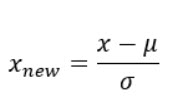

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1. 

**Limitations**
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_scaler = pd.DataFrame(scaler.fit_transform(train_dataset),
                   columns= train_dataset.columns,
                   index = train_dataset.index)
std_scaler.describe().transpose()[['mean', 'std']]

## Normalization in Keras

In [ ]:
### The Normalization layer

## The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.
## The first step is to create the layer:

normalizer = tf.keras.layers.Normalization(axis=-1)

## Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`: 
train_features

normalizer.adapt(np.array(train_features))

## Calculate the mean and variance, and store them in the layer:
print(normalizer.mean.numpy())

#When the layer is called, it returns the input data, with each feature independently normalized.

In [ ]:
## Regression with a deep neural network (DNN) 
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
dnn_model = build_and_compile_model(normalizer)
print(dnn_model.summary())


history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=100)

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)

test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
##Performance

pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T
### Make predictions

# predictions are done with the `dnn_model` on the test set using Keras `Model.predict` and review the loss:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


## References

[All about Feature Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35#:~:text=Feature%20scaling%20is%20essential%20for,that%20calculate%20distances%20between%20data.&text=Therefore%2C%20the%20range%20of%20all,proportionately%20to%20the%20final%20distance.) 

[ effect of different scalers ](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

# Vanishing and Exploding Gradients

Feedforward and recurrent networks construct very deep computational graphs by repeatedly applying the same operation at each time step of a long temporal
sequence. 

For example, suppose that a computational graph contains a path that consists of repeatedly multiplying by a matrix W. After t steps, this is equivalent to multiplying by Wᵗ. Suppose that W has an eigendecomposition W = V diag(λ)V̄. In this simple case, it is straightforward to see that Wᵗ = (V diag(λ)V̄)ᵗ = V diag(λ)ᵗV̄. 

Any eigenvalues λᵢ that are not near an absolute value of 1 will either explode if they are greater than 1 in magnitude or vanish if they are less than 1 in magnitude. The vanishing and exploding gradient problem refers to the fact that gradients through such a graph are also scaled according to diag(λ)ᵗ. Vanishing gradients make it difficult to know which direction the parameters should move to improve
the cost function, while exploding gradients can make learning unstable.

There are three approaches to solving this problem. 





1. **Weight Initialization**

      In their paper published by  [Xavier Glorot and Yoshua Bengio](https://www.researchgate.net/publication/215616968_Understanding_the_difficulty_of_training_deep_feedforward_neural_networks), they suggest that if we want that gradient should neither saturate nor explode then we need to have a variance of the outputs of each layer to be equal to the variance of its inputs, and also gradients to have equal variance before and after flowing through a layer in the reverse direction. To achieve this condition — the number of neurons of the input layer should be equal to the number of neurons of the output layer (i.e. equal fan-in and fan-out of a layer). This solution is not practical.

    Therefore, there is a need for the initialization technique to compensate for this basic requirement — one such option is to have random weight-initialization based on fan-avg=(fan-in + fan-out)/2. This theory leads to the following practical options:
        
*   Xavier Initialization or Glorot Initialization: 
    Normal distribution with mean 0 and variance: σ2 = 1/fan-avg.
    This weight initialization is best suited while using activation functions: tanh, logistic, softmax


*   LeCun initialization
    Replace fan-avg with fan-in the above values will become:
    Normal distribution with mean 0 and variance: σ2 = 1/fan-in
    Or, a uniform distribution between −r and + r, with r = sqrt(3/fan-in)
    LeCun initialization is equivalent to Glorot initialization when fan-in = fan-out
    This weight initialization is best suited while using the SELU activation function.

*   He initialization
    It’s suitable for activation functions: Relu and its variants



In [ ]:
#Keras Implementation
#By default, Keras used Glorot Initialization with a normal distribution. We can explicitly define the kernel-initializer parameter to values, e.g, he_normal or he-uniform :
tf.keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

**2. Activation Functions** 

The choice of the activation function is another reason for saturated gradients as described earlier, the problem is more prominent when using the activation functions such as sigmoid or tanh. The main reason is that the gradient tends to zero for higher-order weights, these functions are sometimes also called Saturated Activation Functions. The possible choices to overcome this issue is by using other class of activation functions which are non-saturated for their derivatives, few options are: ReLU, Leaky-ReLU, RReLU: Randomized Leaky ReLU, PReLU: Parameterized Leaky ReLU, ELU: Exponential Linear Unit, SELU: Scaled Exponential Linear Unit 

In [ ]:
#Keras Implementation
tf.keras.layers.Dense(10, activation="relu")
tf.keras.layers.LeakyReLU()
tf.keras.layers.PReLU()
tf.keras.layers.Dense(10, activation="elu")
tf.keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

3. **Batch Normalization**

Suppose we built a neural network with the goal of classifying grayscale images. The intensity of every pixel in a grayscale image varies from 0 to 255. Prior to entering the neural network, every image will be transformed into a 1 dimensional array. Then, every pixel enters one neuron from the input layer. If the output of each neuron is passed to a sigmoid function, then every value other than 0 (i.e. 1 to 255) will be reduced to a number close to 1. Therefore, it’s common to normalize the pixel values of each image before training. Batch normalization, on the other hand, is used to apply normalization to the output of the hidden layers. 

### Batch Normalization implementation in Keras

In [ ]:
%%time
#Keras implementation
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
#   return tf.cast(image, tf.float32) / 255., label

#Create training dataset
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

#Create testing dataset
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

#Create and train the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
 ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=60,
    validation_data=ds_test,
)
#Visualize the results
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history,'loss')

In [ ]:
%%time
#Create and train the model with Batch Normalization
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10)
 ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=60,
    validation_data=ds_test,
)

plot_metric(history,'loss')

It is seen that the loss is a lot smoother after adding the Batch Normalization layer

### References  
[Does your model train too slow?](https://towardsdatascience.com/vanishing-exploding-gradient-problem-b5b78c142bb7) 

[Batch Normalization Tensorflow Keras Example](https://towardsdatascience.com/backpropagation-and-batch-normalization-in-feedforward-neural-networks-explained-901fd6e5393e) 

Optimization for Training Deep Models - Deep Learning by By Ian Goodfellow, Yoshua Bengio and Aaron Courville, MIT Press

# Curse of the Dimensionality

Many machine learning problems become exceedingly difficult when the number
of dimensions in the data is high. This phenomenon is known as the    **curse of
dimensionality**. One particular concern is that the number of possible distinct
configurations of a set of variables increases exponentially as the number of variables
increases.

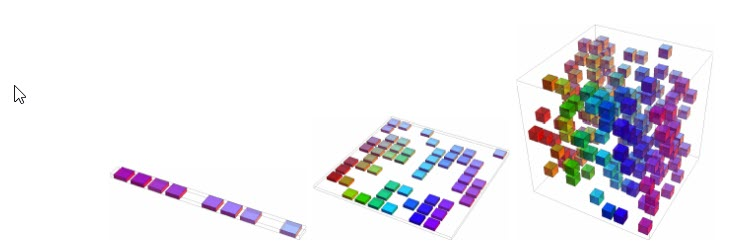 

Photo Credit: Machine Learning Basics - Deep Learning by By Ian Goodfellow, Yoshua Bengio and Aaron Courville, MIT Press 

 As the number of relevant dimensions of the data increases (from left to
right), the number of configurations of interest may grow exponentially making it difficult to predict for any new data point.



## Modelling without PCA

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

mnist = tf.keras.datasets.mnist #data base containing hand-written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()

# normalizing the data to make the neural ntwork easier to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#choosing the sequential model
model = tf.keras.models.Sequential()

#defining the architecture of the model
model.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#defining the parameters to train the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#training the model
history = model.fit(x_train,y_train,epochs=100, batch_size=256, validation_data=(x_test, y_test)) 

#Visualize the results
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history,'loss')

## Modelling with PCA

**Projection**

In most real-world problems, training instances are not spread out uniformly across
all dimensions with most features highly correlated with each other. As a result, all training instances actually lie within
(or close to) a much lower-dimensional subspace of the high-dimensional space. 

Principal Component Analysis (PCA) is the algorithm that identifies the hyperplane that lies closest to the data, and then
it projects the data onto it, by identifying how much components can preserve the variance so that the quality of the data remains the same.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler
mnist = tf.keras.datasets.mnist #data base containing hand-written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()

from sklearn.decomposition import PCA
scaler = StandardScaler()

X_sc_train = scaler.fit_transform(x_train.reshape(60000,784))
X_sc_test = scaler.transform(x_test.reshape(10000,784))

pca = PCA(n_components=500)
pca.fit(x_train.reshape(60000,784))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


Explained Variance Ratio is the metric that indicates
the proportion of the dataset’s variance that lies along the axis of each principal component. 

When explained variance plotted against the the number of components,  as a function of the number of
dimensions, there will usually be an elbow in the
curve, where the explained variance stops growing fast. You can think of this as the
intrinsic dimensionality of the dataset, i.e.,the number of components which retains most of the variance in the dataset


In [ ]:
#Around 150 components the variance is well explained
NCOMPONENTS = 150

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)
 
print("Around 150 components the image quality is also retained")  
def side_by_side(indexes):
    org = x_train[indexes]
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,10):
    side_by_side(index)

model = tf.keras.models.Sequential()
layers = 1
units = 128

model.add(tf.keras.layers.Dense(units, input_dim=NCOMPONENTS, activation='relu'))
model.add(tf.keras.layers.GaussianNoise(pca_std))
for i in range(layers):
    model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.GaussianNoise(pca_std))
    model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 

history = model.fit(X_pca_train,y_train,epochs=100, batch_size=256, validation_data=(X_pca_test, y_test)) 
#Visualize the results
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

plot_metric(history,'loss')



A much smoother validation loss is seen with PCA than without PCA

## References

[Feature extraction techniques](https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be) 

[PCA Decomposition](https://www.kaggle.com/pmmilewski/pca-decomposition-and-keras-neural-network)


Dimensionality Reduction - Hands-On
Machine Learning
with Scikit-Learn
& TensorFlow - Aurélien Géron - O'Reilly 

# Expectation Maximization - EM algorithm

Typical clustering algorithms like K-Means algorithm have a problem in determining the boundary for each clusters as below, 

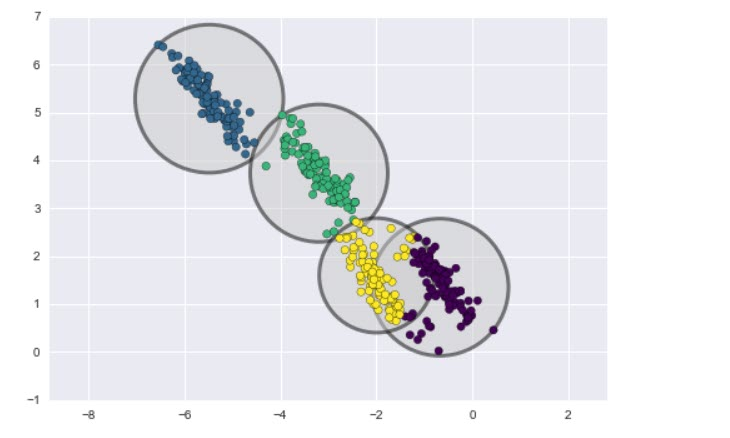


Thus a generative probabilistic model rather than a clustering model, has to be  implemented so that the right of parameters that results in the best fit for the joint probability of the data sample (Maximum Likelihood Estimation) are obtained   and the model also handles unobserved or hidden variables called as latent variables. 

Gaussian mixture model, **GMM** for short,  attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset which is essentially and alternate formulation of maximum likelihood required for searching for the appropriate model parameters in the presence of latent variables. 

Gaussian mixture model uses an **expectation–maximization** approach which qualitatively does the following:

Choose starting guesses for the location and shape

Repeat until converged:

*   E-step: for each point, find weights encoding the probability of membership in each cluster

*   M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights













 The below function helps to visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output

In [ ]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting 

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

## References
[In Depth: Gaussian Mixture Models](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) 